In [1]:
from pybaseball import statcast
import numpy as np

Get data from statcast using pybaseball

In [2]:
#start = '2017-05-01'
# Use shorter time period so I can load this into memory
start = '2019-09-20'
end = '2019-10-06'
data = statcast(start, end)

This is a large query, it may take a moment to complete
Completed sub-query from 2019-09-20 to 2019-09-25
Completed sub-query from 2019-09-26 to 2019-10-01
Completed sub-query from 2019-10-02 to 2019-10-06


In [3]:
np.shape(data)

(45643, 90)

In [8]:
data.groupby('pitch_type').count()['index']

pitch_type
CH     5085
CU     4790
EP        3
FC     2641
FF    16055
FS      656
FT     3760
KC      800
SI     3148
SL     8696
Name: index, dtype: int64

In [7]:
data.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

Since we're trying to predict pitches, we need to get rid of many of these columns

In [8]:
columns = list(data.columns)
columns_keep = ['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z',
                'p_throws', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
               'zone', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'release_spin_rate', 'release_extension',
                'release_pos_y'
               ]

In [9]:
# Iterate through columns_keep and use pop() to remove the columns from `column`
# We will the use data.drop([columns]) to remove the remaining columns from the data frame
def remove_columns(all_columns, remove):
    """
    Parameters
    ----------
    all_columns: list
        all columns in a Pandas dataframe
    remove: list
        columns to remove from 'all_columns'
    Returns
    -------
    all_columns: list
        Updated columns after removal
    """
    for col in remove:
        all_columns.remove(col)
    
    return all_columns

In [10]:
col_to_drop = remove_columns(columns, columns_keep)

In [11]:
data = data.drop(col_to_drop, axis=1)

In [12]:
data.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,zone,p_throws,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,release_spin_rate,release_extension,release_pos_y
0,FC,92.2,-2.7341,6.2773,7.0,R,-0.2042,0.8955,-0.6209,1.9239,5.8618,-134.2079,-7.2855,-3.7087,27.6047,-19.8867,2347.0,6.661,53.8385
1,FC,92.4,-2.8654,6.2946,14.0,R,0.1079,0.7773,1.0586,1.9971,9.7988,-134.3433,-6.9264,-0.4991,25.0737,-21.4812,2371.0,6.556,53.9433
2,FC,92.4,-2.8643,6.3399,8.0,R,0.2493,0.6392,0.2517,1.6561,7.3879,-134.3168,-7.5311,1.5693,26.5736,-23.1126,2283.0,6.295,54.2046
3,FC,91.6,-2.7244,6.3346,11.0,R,-0.0262,0.7692,-0.9579,2.7154,4.5645,-133.4290,-5.0621,-1.2245,26.4589,-21.9677,2128.0,6.780,53.7196
4,KC,82.5,-2.7911,6.2925,13.0,R,0.2459,-1.3550,-0.1291,0.8982,5.5346,-119.8091,-3.0072,1.0726,26.7417,-44.4923,2812.0,5.950,54.5495


### Defining the columns:
#### `release_speed`: Pitch velocities in mph
#### `release_pos_x`: Horizontal release position of pitch from catcher's perspective 
#### `release_pos_z`: Vertical release position of pitch
#### `zone`: Zone location of the ball when it cross the plate from the catcher's perspective
#### `p_throws`: Handedness of pitcher\n
#### `pfx`: Horizontal (or vertical) movement of pitch in feet
#### `plate_`: Position of ball when it reaches plate from catcher's perspective
#### `vx,vy,vz`: velocity of pitch in feet per second
#### `ax,ay,az`: acceleration of pitch, in feet per second^2
#### `release_spin_rate`: Spin rate of pitch
#### `release_extension`: Release extension of pitch in feet
#### `release_pos_y`: Release position of pitch measured in feet from the catcher's perspective.

### Potential Features to add:
#### movement: DIfference of `release_pos` and `plate_pos`

In [13]:
# Add movement
import movement

In [14]:
v_o = [data.vx0, data.vy0, data.vz0]
p_o = [data.release_pos_x, data.release_pos_y, data.release_pos_z]
a = [data.ax, data.ay, data.az]

In [15]:
dx, dz, dzg = movement.calc_movement(p_o, v_o, a)

In [16]:
data['movement_x'] = dx
data['movement_z'] = dz

In [17]:
# Take absolute value of movements to try and get rid of differences between left and right handed pitches
#data['movement_x'] = abs(data['movement_x'])
# data['movement_z'] = abs(data['movement_z']) We don't need to take the absolute value in the z-direction

In [18]:
data.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,zone,p_throws,pfx_x,pfx_z,plate_x,plate_z,...,vy0,vz0,ax,ay,az,release_spin_rate,release_extension,release_pos_y,movement_x,movement_z
0,FC,92.2,-2.7341,6.2773,7.0,R,-0.2042,0.8955,-0.6209,1.9239,...,-134.2079,-7.2855,-3.7087,27.6047,-19.8867,2347.0,6.661,53.8385,-1.437999,5.252248
1,FC,92.4,-2.8654,6.2946,14.0,R,0.1079,0.7773,1.0586,1.9971,...,-134.3433,-6.9264,-0.4991,25.0737,-21.4812,2371.0,6.556,53.9433,0.790338,4.473654
2,FC,92.4,-2.8643,6.3399,8.0,R,0.2493,0.6392,0.2517,1.6561,...,-134.3168,-7.5311,1.5693,26.5736,-23.1126,2283.0,6.295,54.2046,1.771752,3.410716
3,FC,91.6,-2.7244,6.3346,11.0,R,-0.0262,0.7692,-0.9579,2.7154,...,-133.4290,-5.0621,-1.2245,26.4589,-21.9677,2128.0,6.780,53.7196,-0.174665,4.410602
4,KC,82.5,-2.7911,6.2925,13.0,R,0.2459,-1.3550,-0.1291,0.8982,...,-119.8091,-3.0072,1.0726,26.7417,-44.4923,2812.0,5.950,54.5495,1.672596,-11.288157


In [19]:
data = data.dropna(subset=['pitch_type'])

In [20]:
pitch_types = list(data.pitch_type.values)

In [21]:
set(pitch_types)

{'CH', 'CU', 'EP', 'FC', 'FF', 'FS', 'FT', 'KC', 'SI', 'SL'}

### Pitch Types
#### `CH`: changeup
#### `CU`:  curveball
#### `EP`: ephus
#### `FC`: cutter
#### `FF`: four-seam
#### `FS`: splitter
#### `FT`: two-seam 
#### `KC`: knuckle-curve
#### `SI`: sinker
#### `SL`: slider

Let's take a look at some distributions of several of these features

In [22]:
import numpy as np
import matplotlib.pyplot as plt

/Users/raymatsumoto/anaconda3/envs/mosdef36/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/raymatsumoto/anaconda3/envs/mosdef36/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


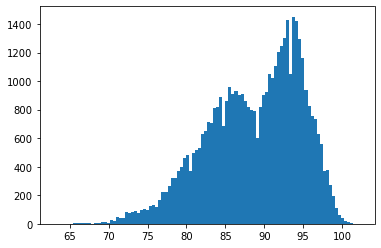

In [23]:
speed_histo = plt.hist(data.release_speed, bins=100)

There appears to be a distribution of pitches around 85 mph(off-speed) and a distribution around 93-4 mph (fastball)

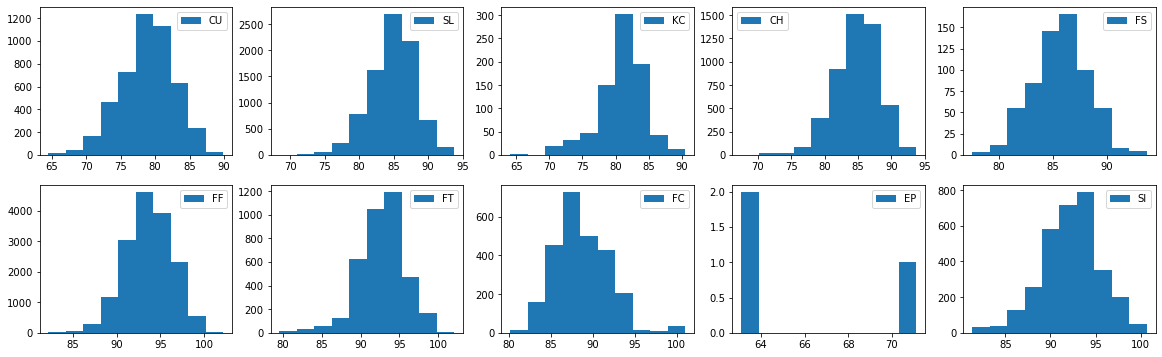

In [24]:
num_pitches = len(set(pitch_types))
pitches = list(set(pitch_types))
fig, axes = plt.subplots(nrows=2, ncols=round(num_pitches/2), figsize=(20,6))
k = 0
for i in [0,1]:
    for j in range(round(num_pitches/2)):
        histo = axes[i,j].hist(data.release_speed[data.pitch_type == pitches[k]], label=pitches[k])
        axes[i,j].legend()
        k += 1

### A Few notes on pitch types versus velocity:
#### - Sinker, Four-seam, two-seam, and cutter have similar velocity distributions
#### - curve, knuckle-curve, and changeup have similar velocity distributions
#### - ephus pitches are hardely thrown, and when they are, their velocities are much lower than the other pitches

Pitch movement: http://baseball.physics.illinois.edu/Movement.pdf

In [25]:
data.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'zone',
       'p_throws', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0',
       'ax', 'ay', 'az', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'movement_x', 'movement_z'],
      dtype='object')

#### Movement: deviation of trajectory from a straight line without the effect of gravity

In [26]:
columns_keep = ['pitch_type', 'release_speed', 'pfx_x', 'pfx_z', 'release_spin_rate',
                'movement_x', 'movement_z']
columns = list(data.columns)

In [27]:
col_to_drop = remove_columns(columns, columns_keep)

In [28]:
data = data.drop(col_to_drop, axis=1)

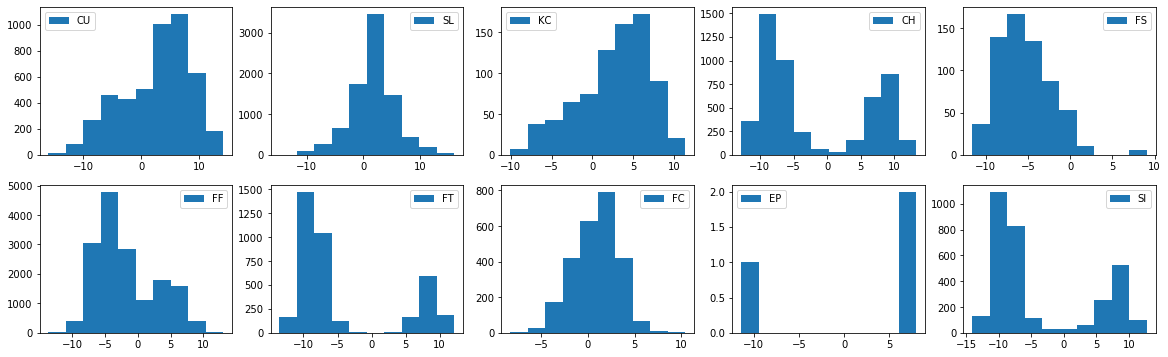

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=round(num_pitches/2), figsize=(20,6))
k = 0
for i in [0,1]:
    for j in range(round(num_pitches/2)):
        histo = axes[i,j].hist(data.movement_x[data.pitch_type == pitches[k]], label=pitches[k])
        axes[i,j].legend()
        k += 1

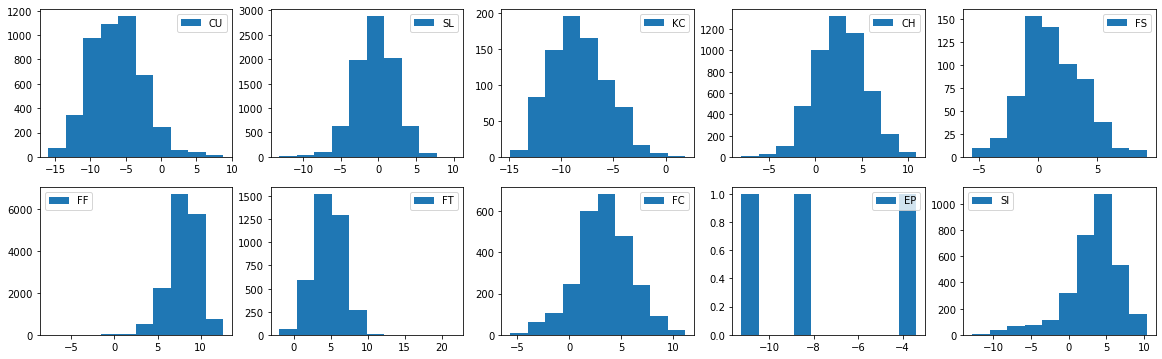

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=round(num_pitches/2), figsize=(20,6))
k = 0
for i in [0,1]:
    for j in range(round(num_pitches/2)):
        histo = axes[i,j].hist(data.movement_z[data.pitch_type == pitches[k]], label=pitches[k])
        axes[i,j].legend()
        k += 1

### Convert the categorical variables to numerical values 

In [31]:
#Creating the dependent variable class
import pandas as pd
factor = pd.factorize(data['pitch_type'])
data['pitch_type'] = factor[0]
definitions = factor[1]
print(set(data.pitch_type))
print(definitions)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Index(['FC', 'KC', 'SL', 'CH', 'FF', 'FT', 'CU', 'SI', 'FS', 'EP'], dtype='object')


TODO: Look up appropriate models to use

In [32]:
data.head()

,pitch_type,release_speed,pfx_x,pfx_z,release_spin_rate,movement_x,movement_z
0,0,92.2,-0.2042,0.8955,2347.0,-1.437999,5.252248
1,0,92.4,0.1079,0.7773,2371.0,0.790338,4.473654
2,0,92.4,0.2493,0.6392,2283.0,1.771752,3.410716
3,0,91.6,-0.0262,0.7692,2128.0,-0.174665,4.410602
4,1,82.5,0.2459,-1.3550,2812.0,1.672596,-11.288157


### Understanding the movements
- The pitches with positive z-movement are thrown with significant backspin, with forces acting upwards (Magnus Force)
- The pitches with downward movement like sliders and curveballs have negative z-movement
- Sinkers have positive z-movement although I wouldn't expect this to be the case.  I might have to look at this in greater detail.
- 

In [33]:
# Import Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [34]:
# Remove NaN Values
data = data.dropna()

### Try random forest model without x and z movements

In [32]:
# Split the data into the features (X) and the label to predict (y)
base = data.drop(['movement_x', 'movement_z'], axis=1)
y = base['pitch_type']
X = base.loc[:, base.columns != 'pitch_type']

In [33]:
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Now use `train_test_split` in scikit-learn to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                           oob_score=True,
                           random_state=0)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

In [ ]:
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(len(definitions)),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
rf_predictions = np.vectorize(reversefactor.get)(rf_predictions)
# Making the Confusion Matrix
print(pd.crosstab(y_test, rf_predictions, rownames=['Actual Pitches'], colnames=['Predicted Pitches']))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rf_predictions)

### Now let's try the model with the x and z movements included as features

In [37]:
# Split the data into the features (X) and the label to predict (y)
y = data['pitch_type']
X = data.loc[:, data.columns != 'pitch_type']

In [38]:
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now use `train_test_split` in scikit-learn to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                           oob_score=True,
                           random_state=0)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

In [ ]:
#Reverse factorize (converting y_pred from 0s,1s and 2s
reversefactor = dict(zip(range(len(definitions)),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
rf_predictions = np.vectorize(reversefactor.get)(rf_predictions)
# Making the Confusion Matrix
print(pd.crosstab(y_test, rf_predictions, rownames=['Actual Pitches'], colnames=['Predicted Pitches']))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rf_predictions)

### TODO:
- Should we undersample the four-seam fastballs?
- Look at other features to add into the model
- Try other models besides random forest
- normalize between right and left handed pitch
- 

### Results so far
Looking at the predicted vs actual results, the model is doing a better job predicting some pitches compared to others.  The model in particular is having a tough time differentiating between sliders, sinkers, knucklecurves, two-seams, and cutters. We may have to undersample the four-seam fastballs so the other pitches can be better trained.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(seed=1)
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_test)

In [ ]:
#Reverse factorize (converting y_pred from 0s,1s and 2s
reversefactor = dict(zip(range(len(definitions)),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
xgb_predictions = np.vectorize(reversefactor.get)(xgb_predictions)
# Making the Confusion Matrix
print(pd.crosstab(y_test, xgb_predictions, rownames=['Actual Pitches'], colnames=['Predicted Pitches']))

In [ ]:
accuracy_score(y_test, xgb_predictions)

In [63]:
# Try undersampling the four-seam fastballs
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [66]:
#nsamp = 40000
#categories = {5: nsamp, 9: nsamp, 11: nsamp}
X_resampled, y_resampled = RandomOverSampler(sampling_strategy='not majority', random_state=69).fit_resample(X_train,y_train)
#X_resampled, y_resampled = RandomOverSampler('not majority').fit_resample(X_train,y_train)

In [54]:
len(X_resampled)

104120

In [ ]:
#list_y = list(y)
#resample_dict = {k: list_y.count(k) for k in range(10)}

In [ ]:
# Set Number of four seam fastballs (4) to 30000
#resample_dict[4] = 30000

In [ ]:
rus = ClusterCentroids(random_state=0, sampling_strategy=resample_dict)
X_resampled, y_resampled = rus.fit_sample(X, y)

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                           oob_score=True,
                           random_state=0)

rf.fit(X_resampled, y_resampled)

rf_predictions = rf.predict(X_test)

In [78]:
#Reverse factorize (converting y_pred from 0s,1s and 2s
reversefactor = dict(zip(range(len(definitions)),definitions))
y_update = np.vectorize(reversefactor.get)(y_test)
rf_update = np.vectorize(reversefactor.get)(rf_predictions)
# Making the Confusion Matrix
print(pd.crosstab(y_update, rf_update, rownames=['Actual Pitches'], colnames=['Predicted Pitches']))

Predicted Pitches    CH    CU   FC    FF  FS   FT   KC   SI    SL
Actual Pitches                                                   
CH                 1543     8    7    17  28   58    1   38    32
CU                   14  1282    0     0   0    0   59    3   219
EP                    0     1    0     0   0    0    0    0     0
FC                    9     5  469   116   1    0    0    0   341
FF                   27     0  105  5168   0  215    0  114    11
FS                  100     0    0     0  93    4    0    6     9
FT                   49     0    0   177   1  786    0  262     3
KC                    1   155    0     0   0    0  121    1    16
SI                   42     0    1   143   0  328    3  541     2
SL                   41   207  214     4   9    1   14    1  2211


In [62]:
import collections
collections.Counter(y_resampled)

Counter({5: 10412,
         0: 10412,
         3: 10412,
         4: 10412,
         2: 10412,
         7: 10412,
         8: 10412,
         6: 10412,
         1: 10412,
         9: 10412})

Normalized confusion matrix


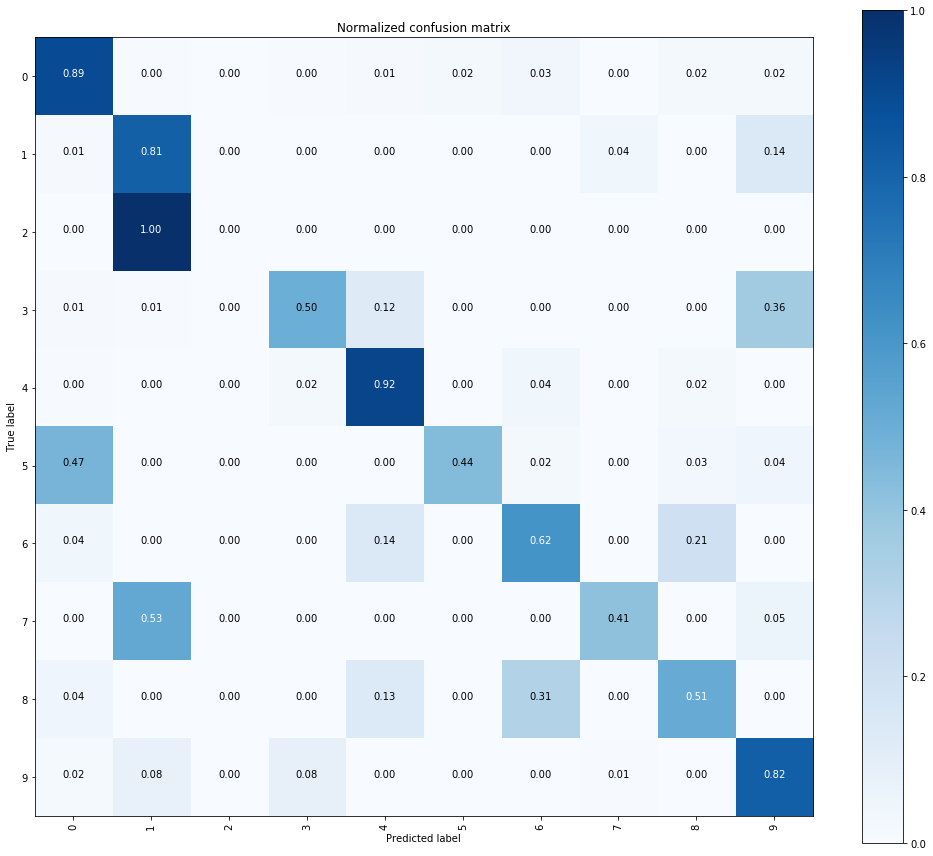

In [96]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(y_update, rf_update)

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=list(set(data.pitch_type)), normalize=True,
                      title='Normalized confusion matrix')

#fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_update, rf_update)

0.7945296864576384

### Pitches we need to get better at
- SI
- FT
- FS
- FC

In [43]:
data.head()

,pitch_type,release_speed,pfx_x,pfx_z,release_spin_rate,movement_x,movement_z
0,0,92.2,-0.2042,0.8955,2347.0,-1.437999,5.252248
1,0,92.4,0.1079,0.7773,2371.0,0.790338,4.473654
2,0,92.4,0.2493,0.6392,2283.0,1.771752,3.410716
3,0,91.6,-0.0262,0.7692,2128.0,-0.174665,4.410602
4,1,82.5,0.2459,-1.3550,2812.0,1.672596,-11.288157


### See if we can check the z_movement at different timepoints of the pitch. The idea is that the sinker only breaks at the end of the pitch

In [ ]:
# Might have to try pfx vs x_movement